# Principale Component Analysis (PCA)

## 1 Preliminary

## 1.1 Context

Ce TP est en lien avec l'activité [Réalisez une ACP](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp), de la partie 2 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le *jeu de données mystère*.

## 1.2 Imports

Nous allons importer nos librairies :

In [1]:
######

# Il manque du code !

######
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px

## 1.3 Graphics and Options

On *charge* `seaborn` :

In [2]:
sns.set()

<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
<script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/popper.js@1.12.9/dist/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>

## 1.4 Data

Nous allons maintenant charger les données. Pour ce faire vous pouvez les retrouver sur cette [page du cours](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours).

<br>

------------------------


<br>


Si vous utlisez Google Colab et que vous ne savez pas comment importer un fichier .csv, voici une [vidéo](https://youtu.be/6HFlwqK3oeo?t=171) à regarder à partir de 2:53

<br>

-------------------------------------

<br>


Importons notre fichier :

In [3]:
df = pd.read_csv("./../../data/mystery.csv")
df

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199
...,...,...,...
4995,-0.724429,19.077317,-0.002715
4996,-1.941668,-3.481421,22.924661
4997,-4.305507,-5.330243,5.650440
4998,-7.067287,9.422035,23.186741


## 1.5 Functions

Nous allons copier - coller les fonctions de notre précédent notebook.

Ces fonctions sont assez complexes. Je ne vous demande pas de les comprendre de A à Z. Essayez juste de les lire à la volée pour voir si vous les comprenez.

Si vous ne comprenez pas tout, encore une fois, cela n'est pas grave.


Pour le graphe des correlations :

In [4]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Pour les plans factoriels :

In [5]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



Si vous avez vu des choses bizarres dans le code, pas de soucis, supprimez les lignes en question !

## 2 Data Preparation

Avant de nous jeter dans le grand bain, nous allons devoir étudier et préparer un peu le terrain.

## 2.1 Quick tour

Tout d'abord faisons un rapide tour de nos données. Commencons par les afficher :

In [6]:
df.head()

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


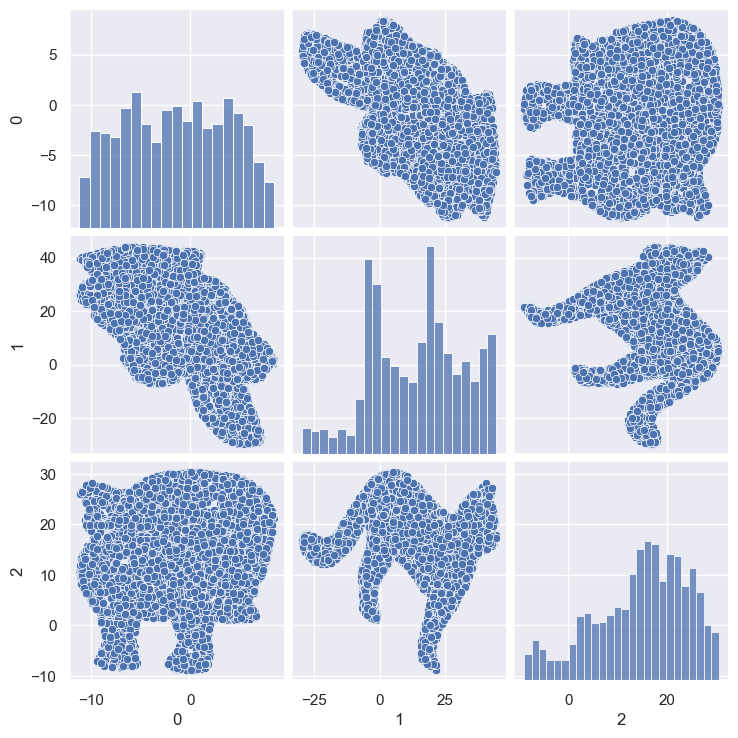

In [7]:
sns.pairplot(df)

Quelle est la dimension de notre dataframe?

In [8]:
df.shape

(5000, 3)

La méthode `info` nous donne des indications globales :

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


Quel est le % de valeurs manquantes par colonne ?

In [10]:
df.isnull().mean()

0    0.0
1    0.0
2    0.0
dtype: float64

Y a-t-il des lignes en double ?

In [11]:
df.duplicated().sum()

190

Combien y a-t-il de valeurs différentes par colonne ?

In [12]:
df.nunique()

0    4810
1    4810
2    4810
dtype: int64

Enfin la methode `describe` nous donne une idée de la dispertion globale de nos données :

Le dataframe est assez simple, pas de nettoyage à faire. Tant mieux!

## 3 About PCA

## 3.1 Scaling

Nous allons effectuer notre scaling. Attention toutefois, réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité.

On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.

Pour ce faire, on peut utiliser l'argument `with_std=False` :

In [13]:
scaler = StandardScaler(with_std=False)
scaler

StandardScaler(with_std=False)

On fit :

In [14]:
######

# Il manque du code !

######
scaler.fit(df)

StandardScaler(with_std=False)

On transforme :

In [15]:
######

# Il manque du code !

######
X = scaler.transform(df)

## 3.2 PCA

Nous allons travailler sur les 3 composantes :

In [16]:
n_components = 3

On instancie notre ACP :

In [17]:
######

# Il manque du code !

######
pca = PCA(n_components)

On l'entraine :

In [18]:
######

# Il manque du code !

######
pca.fit(X)

PCA(n_components=3)

## 3.3 Explained variance & scree plot

Intéressons nous maintenant à la variance *captée* par chaque nouvelle composante. Grace à `scikit-learn` on peut utiliser l'attribut `explained_variance_ratio_` :

In [19]:
pca.explained_variance_ratio_

array([0.74965329, 0.20442347, 0.04592324])

Ici la 1ère composante *capte* 75% de la variance de nos données initiales, la 2ème 20% etc etc.

Enregistrons cela dans une variable :

In [20]:
######

# Il manque du code !

######
var_ratio = pca.explained_variance_ratio_

Les 2 premières composantes *captent* - à elles seules -  `75+20 = 95%` de la variance!!!

Dans le jargon, cela s'appelle une *somme cumulée*. Et pour faire une somme cumulée `numpy`dispose de la fonction `cumsum` :

In [21]:
######

# Il manque du code !

######
var_ratio_cum = np.cumsum(var_ratio)

Définisions ensuite une variable avec la liste de nos composantes :

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

On peut enfin l'afficher de façon graphique :

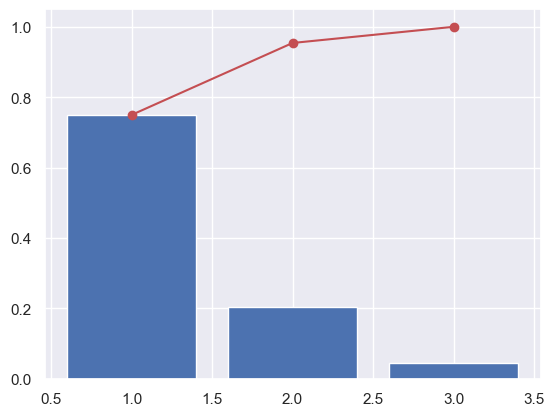

In [23]:
######

# Il manque du code !

######
plt.figure()
plt.bar(x_list, var_ratio, data=var_ratio)
plt.plot(x_list, var_ratio_cum, 'ro-')


In [24]:
plt.bar??

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 95% de la variance est comprise dans les 2 premières composantes. En clair, la 3e composante n'est pas très *utile*...

## 3.4 Components

Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` :

In [25]:
######

# Il manque du code !

######
pcs = pca.components_
pcs

array([[ 0.15580956, -0.98750579, -0.02357312],
       [-0.06045988,  0.01428585, -0.99806839],
       [-0.98593508, -0.15693382,  0.05747861]])

Affichons la même chose mais version `pandas` :

In [26]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2
0,0.155810,-0.987506,-0.023573
1,-0.060460,0.014286,-0.998068
2,-0.985935,-0.156934,0.057479


Intéressant... Mais pas encore très clair...
Continuons le travail :

In [27]:
pcs.columns = df.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,0,1,2
F1,0.16,-0.99,-0.02
F2,-0.06,0.01,-1.00
F3,-0.99,-0.16,0.06


De mieux en mieux !  

-- **ATTENTION** -- : Nous avons arrondi les résultats pour simplifier l'analyse :)



Alors, comment calcule t-on la première composante `F1` ?

et bien c'est assez simple :

`F1 = (0.16 * x) + (-0.99 * y) + (0.02 * z)`

et F2 ?

`F2 = (-0.06 * x) + (-0.01 * y) + (-1.0 * z)`

**Eureka !**



Dans certains cas, on voudra afficher ce dataframe comme cela :

In [28]:
pcs.T

,F1,F2,F3
0,0.155810,-0.060460,-0.985935
1,-0.987506,0.014286,-0.156934
2,-0.023573,-0.998068,0.057479


Et pour une représentation plus *visuelle*, comme cela :

In [29]:
sns.heatmap??

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Source:   
def heatmap(
    data, *,
    vmin=None, vmax=None, cmap=None, center=None, robust=False,
    annot=None, fmt=".2g", annot_kws=None,
    linewidths=0, linecolor="white",
    cbar=True, cbar_kws=None, cbar_ax=None,
    square=False, xticklabels="auto", yticklabels="auto",
    mask=None, ax=None,
    **kwargs
):
    """Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a

<Axes: >

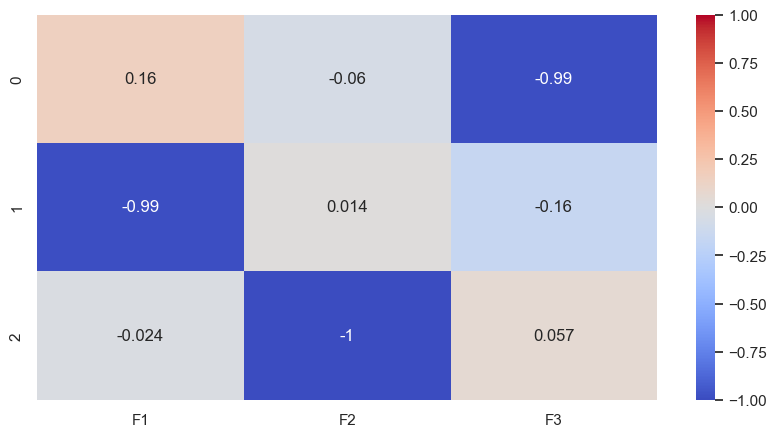

In [30]:
######

# Il manque du code !

######
plt.figure(figsize=(10,5))
sns.heatmap(pcs.T, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

A ce stade, on sait déja que :  
* `F1+F2 =95%` de la variance.
* `F1 = -y + 'un peu' de x` et `F2 = z`

## 3.5 Correlation graph

Pour la partie graphique, nous allons utiliser les fonctions vues dans la section 1.5.



Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [31]:
x, y = 0,1

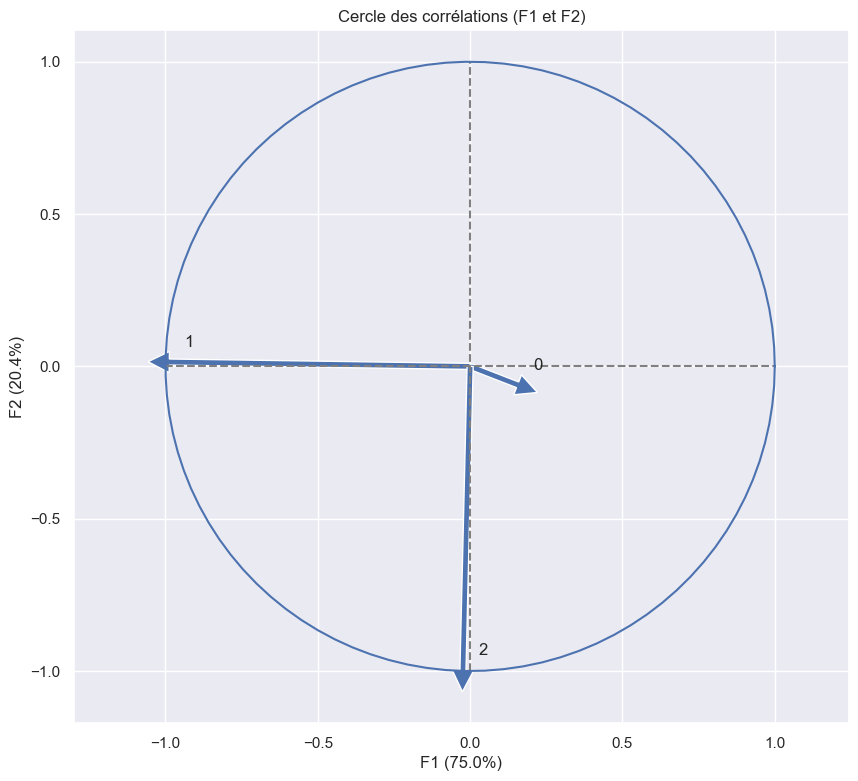

In [32]:
######

# Il manque du code !

######
correlation_graph(pca, (x,y), list(df.columns))

Conclusion : F1 est principalement composée de -y et F2 de -z.

## 3.6 Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [33]:
######

# Il manque du code !

######
X_projected = pca.transform(X)

On rappelle que :

In [34]:
x, y

(0, 1)

In [35]:
x_y = x, y
x_y

(0, 1)

Essayons avec F1 et F2 :

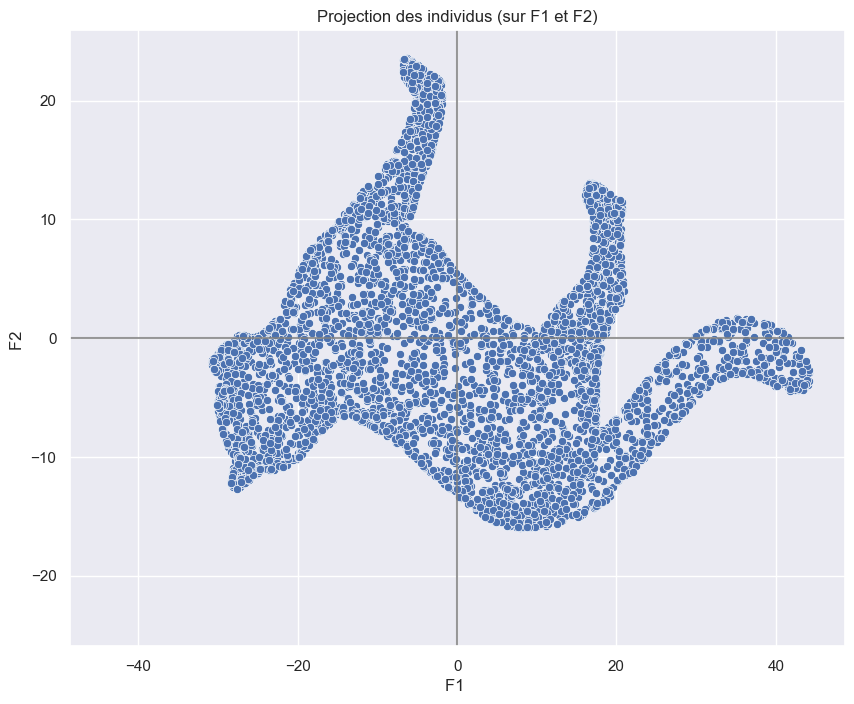

In [36]:
######

# Il manque du code !

######
display_factorial_planes(   X_projected,
                            x_y
                        )

Ohhhh ... Un chat !

Essayons avec F1 et F3 :

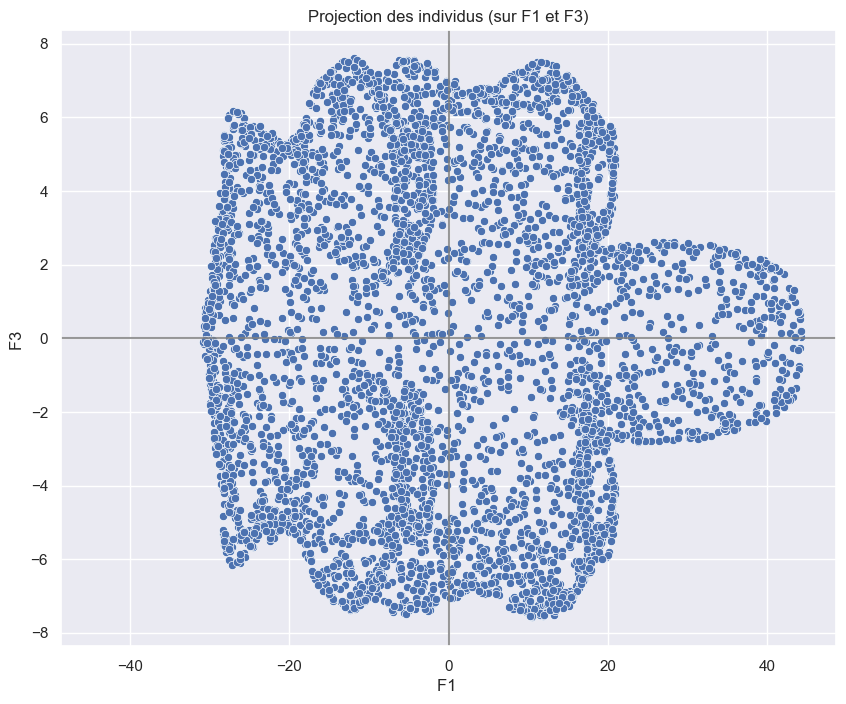

In [37]:
x_y = [0,2]

######

# Il manque du code !

######

display_factorial_planes(   X_projected,
                            x_y
                        )

Un chat vue de dessous ?

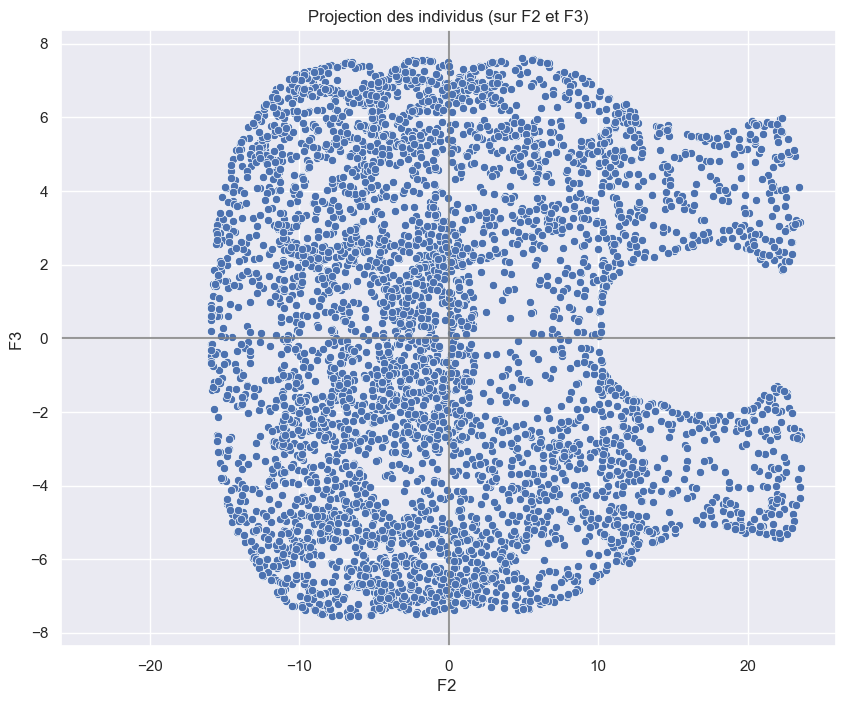

In [38]:
x_y = [1,2]

######

# Il manque du code !

######
display_factorial_planes(   X_projected,
                            x_y
                        )

Un chat vue de derrière ?

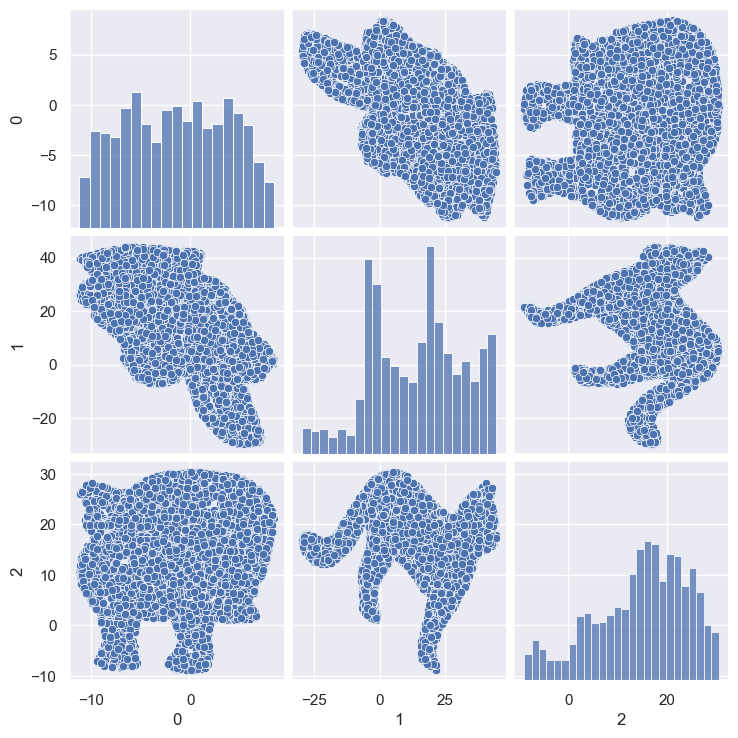

In [39]:
sns.pairplot(df)